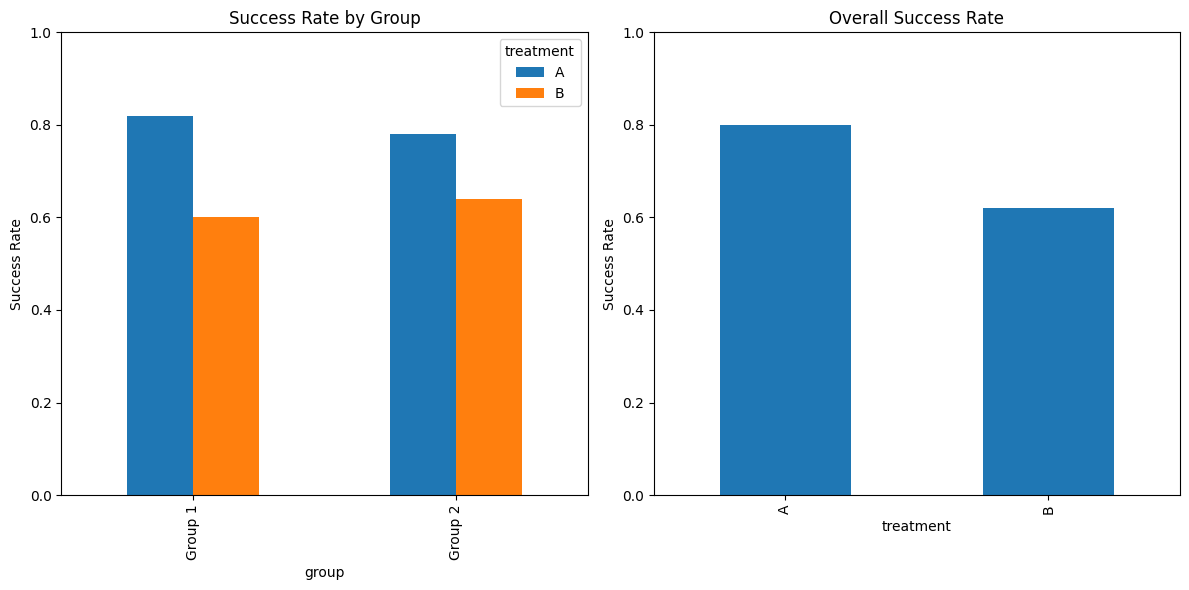

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a dataset that demonstrates Simpson's paradox

# Group A data (Group 1 and Group 2)
group_1 = pd.DataFrame({
    'group': 'Group 1',
    'treatment': ['A'] * 50 + ['B'] * 50,
    'success': np.concatenate([np.random.binomial(1, 0.8, 50), np.random.binomial(1, 0.6, 50)])
})

group_2 = pd.DataFrame({
    'group': 'Group 2',
    'treatment': ['A'] * 50 + ['B'] * 50,
    'success': np.concatenate([np.random.binomial(1, 0.7, 50), np.random.binomial(1, 0.5, 50)])
})

# Combine the groups
data = pd.concat([group_1, group_2])

# Calculate success rates for each group and overall
grouped_success = data.groupby(['group', 'treatment'])[
    'success'].mean().unstack()
overall_success = data.groupby('treatment')['success'].mean()

# Plot the success rates for each group and overall
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Success rates by group
grouped_success.plot(kind='bar', ax=axes[0], title='Success Rate by Group')
axes[0].set_ylabel('Success Rate')
axes[0].set_ylim(0, 1)

# Overall success rate
overall_success.plot(kind='bar', ax=axes[1], title='Overall Success Rate')
axes[1].set_ylabel('Success Rate')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

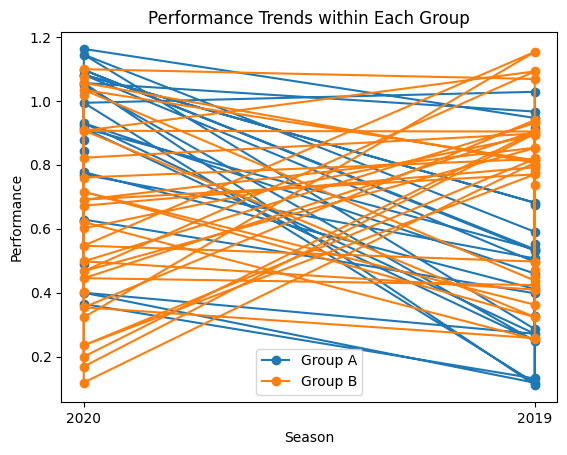

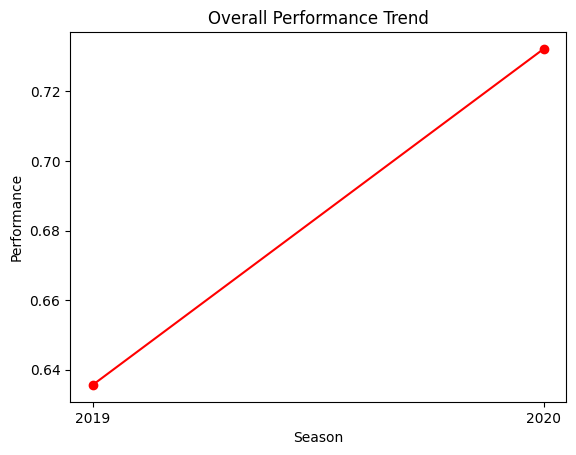

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(0)
size = 100
data = pd.DataFrame({
    'group': np.random.choice(['A', 'B'], size=size),
    'season': np.random.choice(['2019', '2020'], size=size),
    'performance': np.random.rand(size)
})

# Add trend to data
data.loc[(data['group'] == 'A') & (
    data['season'] == '2019'), 'performance'] += 0.1
data.loc[(data['group'] == 'A') & (
    data['season'] == '2020'), 'performance'] += 0.2
data.loc[(data['group'] == 'B') & (
    data['season'] == '2019'), 'performance'] += 0.2
data.loc[(data['group'] == 'B') & (
    data['season'] == '2020'), 'performance'] += 0.1

# Plot performance trends within each group
for group in data['group'].unique():
    group_data = data[data['group'] == group]
    plt.plot(group_data['season'], group_data['performance'],
             marker='o', linestyle='-', label=f'Group {group}')

plt.legend()
plt.title("Performance Trends within Each Group")
plt.xlabel("Season")
plt.ylabel("Performance")
plt.show()

# Combine data to see the overall trend
grouped_data = data.groupby('season')['performance'].mean().reset_index()
plt.plot(grouped_data['season'], grouped_data['performance'],
         marker='o', color='red', linestyle='-')
plt.title("Overall Performance Trend")
plt.xlabel("Season")
plt.ylabel("Performance")
plt.show()

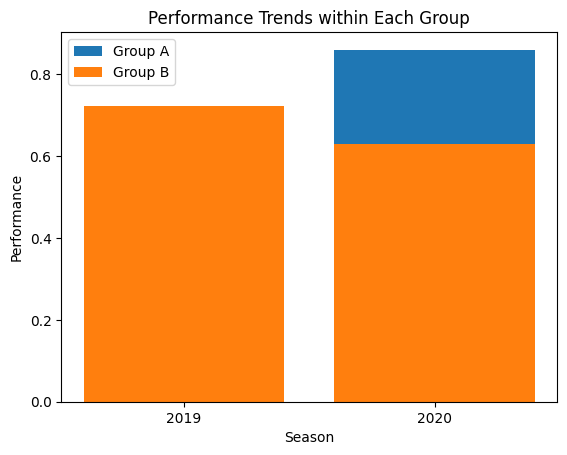

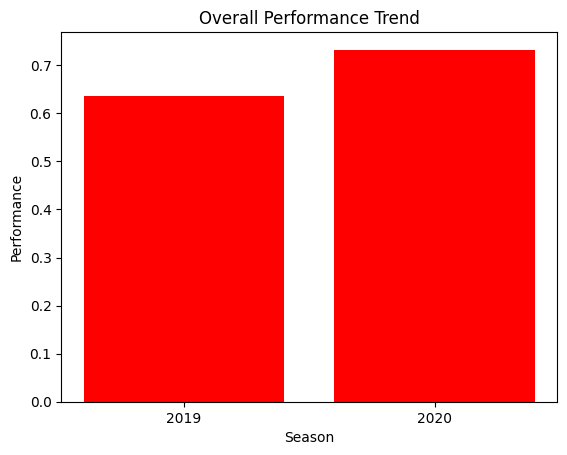

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(0)
size = 100
data = pd.DataFrame({
    'group': np.random.choice(['A', 'B'], size=size),
    'season': np.random.choice(['2019', '2020'], size=size),
    'performance': np.random.rand(size)
})

# Add trend to data
data.loc[(data['group'] == 'A') & (
    data['season'] == '2019'), 'performance'] += 0.1
data.loc[(data['group'] == 'A') & (
    data['season'] == '2020'), 'performance'] += 0.2
data.loc[(data['group'] == 'B') & (
    data['season'] == '2019'), 'performance'] += 0.2
data.loc[(data['group'] == 'B') & (
    data['season'] == '2020'), 'performance'] += 0.1

# Ensure consistent order of seasons
seasons_order = ['2019', '2020']

# Plot performance trends within each group using bar charts
fig, ax = plt.subplots()
for group in data['group'].unique():
    group_data = data[data['group'] == group]
    avg_performance = group_data.groupby(
        'season')['performance'].mean().reindex(seasons_order)
    ax.bar(avg_performance.index, avg_performance, label=f'Group {group}')

plt.legend()
plt.title("Performance Trends within Each Group")
plt.xlabel("Season")
plt.ylabel("Performance")
plt.show()

# Combine data to see the overall trend using bar charts
grouped_data = data.groupby('season')['performance'].mean().reindex(
    seasons_order).reset_index()
plt.bar(grouped_data['season'], grouped_data['performance'], color='red')
plt.title("Overall Performance Trend")
plt.xlabel("Season")
plt.ylabel("Performance")
plt.show()

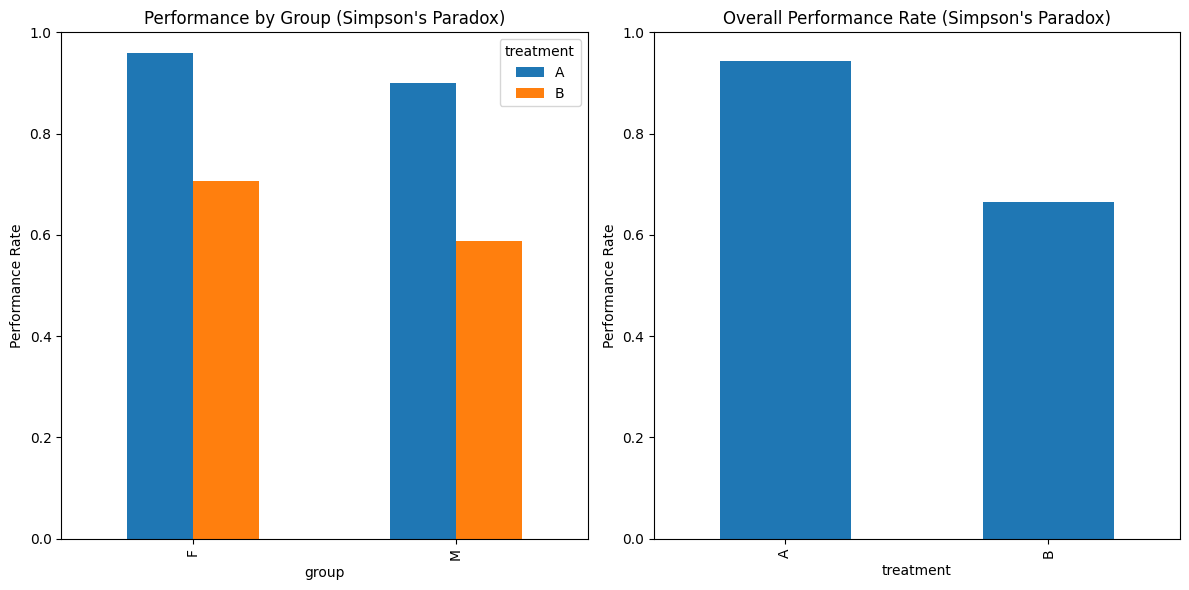

In [4]:
# Reimporting necessary libraries after environment reset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Let's create a new dataset with two treatments (A and B) and two groups (M and F) to simulate Simpson's paradox.

# Group M: Treatment A is better than B, but the group is smaller.
group_M = pd.DataFrame({
    'group': 'M',
    'treatment': ['A'] * 20 + ['B'] * 80,
    'performance': np.concatenate([np.random.binomial(1, 0.85, 20), np.random.binomial(1, 0.6, 80)])
})

# Group F: Treatment A is better than B, but the group is larger.
group_F = pd.DataFrame({
    'group': 'F',
    'treatment': ['A'] * 50 + ['B'] * 150,
    'performance': np.concatenate([np.random.binomial(1, 0.9, 50), np.random.binomial(1, 0.7, 150)])
})

# Combine the groups
data = pd.concat([group_M, group_F])

# Calculate performance rates for each group and overall
grouped_performance = data.groupby(['group', 'treatment'])[
    'performance'].mean().unstack()
overall_performance = data.groupby('treatment')['performance'].mean()

# Create two plots side by side: one for group performance and one for overall performance
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Performance rates by group (M and F)
grouped_performance.plot(
    kind='bar', ax=axes[0], title='Performance by Group (Simpson\'s Paradox)')
axes[0].set_ylabel('Performance Rate')
axes[0].set_ylim(0, 1)

# Overall performance rate (aggregated data)
overall_performance.plot(
    kind='bar', ax=axes[1], title='Overall Performance Rate (Simpson\'s Paradox)')
axes[1].set_ylabel('Performance Rate')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

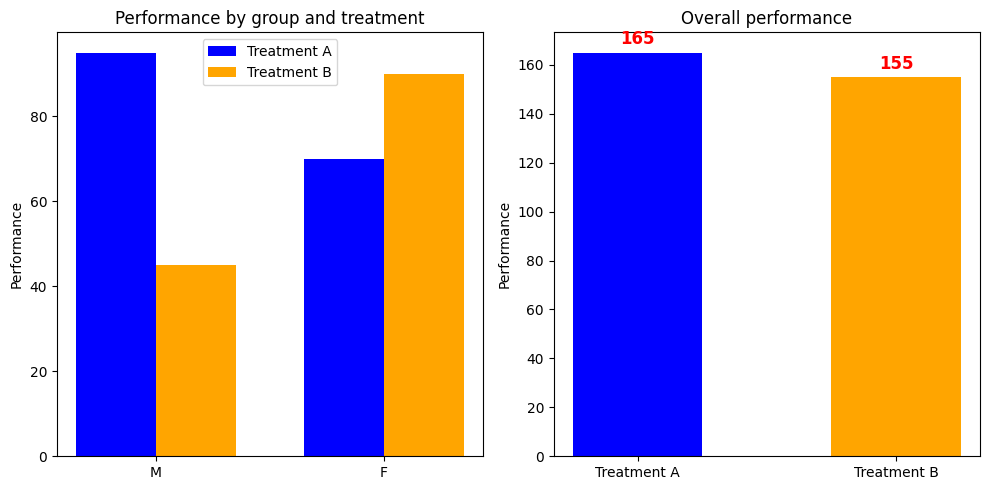

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the two groups (M and F) and two treatments (A and B)
group_labels = ['M', 'F']
treatment_A = [95, 70]  # Performance of treatment A for M and F
treatment_B = [45, 90]  # Performance of treatment B for M and F

overall_A = 165  # Overall performance of treatment A
overall_B = 155  # Overall performance of treatment B

# Create figure and axes for the two plots with more emphasis on the values in the second plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Performance by group
rects1 = ax1.bar(x - width/2, treatment_A, width, label='Treatment A', color='blue')
rects2 = ax1.bar(x + width/2, treatment_B, width, label='Treatment B', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax1.set_ylabel('Performance')
ax1.set_title('Performance by group and treatment')
ax1.set_xticks(x)
ax1.set_xticklabels(group_labels)
ax1.legend()

# Plot 2: Overall performance with two vertical bars and emphasizing differences
overall_labels = ['Treatment A', 'Treatment B']
overall_performance = [overall_A, overall_B]

rects3 = ax2.bar(overall_labels, overall_performance,
                 width=0.5, color=['blue', 'orange'])

# Adding title and labels
ax2.set_title('Overall performance')
ax2.set_ylabel('Performance')

# Add value labels on top of the bars in the second plot
for rect in rects3:
    height = rect.get_height()
    ax2.annotate(f'{height}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='red')

# Show plot
plt.tight_layout()
plt.show()